### import the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
# import sklearn.model_selection.train_test_split as train_test_split

import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression
# sklearn - scikit learn

### UDFs

In [3]:
def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max']) 

### data import

In [5]:
cars = pd.read_csv(r"Car_sales - 1721637749529.csv")

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

In [7]:
cars.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [8]:
cars.nunique()

Manufacturer               30
Model                     156
Sales_in_thousands        157
four_year_resale_value    117
Vehicle_type                2
Price_in_thousands        152
Engine_size                31
Horsepower                 66
Wheelbase                  88
Width                      78
Length                    127
Curb_weight               147
Fuel_capacity              55
Fuel_efficiency            20
Latest_Launch             130
Power_perf_factor         154
dtype: int64

#### separate the categorical vs continuous variables

In [9]:
# creating a copy of the data
cars_continuous = cars.select_dtypes('float64')
cars_categorical = cars.select_dtypes('object')

# creating the variables with column names
cars_cat_variables = cars.select_dtypes('object').columns
cars_conti_variables = cars.select_dtypes('float64').columns

### data summary

In [10]:
cars_continuous.apply(continuous_var_summary)
# cars.loc[:, cars_conti_variables ].apply(continuous_var_summary)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,157,117,152,31,66,88,78,127,147,55,20,154
n_tot,157,157,157,157,157,157,157,157,157,157,157,157
n,157,121,155,156,156,156,156,156,155,156,154,155
nmiss,0,36,2,1,1,1,1,1,2,1,3,2
perc_miss,0.0,22.929936,1.273885,0.636943,0.636943,0.636943,0.636943,0.636943,1.273885,0.636943,1.910828,1.273885
sum,8320.698,2186.83,4245.567,477.5,29008.0,16768.0,11099.4,29225.6,523.594,2800.5,3672.0,11941.756636
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.15,187.34359,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
var,4628.002257,131.180007,205.969949,1.0913,3214.926385,58.389512,11.915419,180.412023,0.397532,15.115932,18.341567,632.153558


#### outlier treatment

In [11]:
cars_continuous = cars_continuous.apply( lambda x: x.clip( lower = x.quantile(0.01), upper = x.quantile(0.99) ) )

#### missing value treatment

In [12]:
cars_continuous = cars_continuous.apply( lambda x: x.fillna( x.mean() ) )

#### summary

In [13]:
cars_continuous.apply(continuous_var_summary)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,155,116,151,30,65,88,77,126,146,55,20,153
n_tot,157,157,157,157,157,157,157,157,157,157,157,157
n,157,157,157,157,157,157,157,157,157,157,157,157
nmiss,0,0,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,8025.5292,2829.141298,4290.61297,478.860064,29095.622436,16867.536538,11173.619551,29411.272949,530.528485,2817.848077,3731.298701,12065.384534
mean,51.11802,18.020008,27.328745,3.050064,185.322436,107.436538,71.169551,187.332949,3.379162,17.948077,23.766234,76.849583
std,57.722699,9.80668,13.973525,0.979125,52.646914,7.400461,3.379455,13.07823,0.617766,3.807591,3.956157,23.691622
var,3331.909938,96.170969,195.259402,0.958686,2771.697606,54.766822,11.420718,171.04011,0.381634,14.497753,15.651182,561.292961


#### summary of categorical variables

In [14]:
cars_categorical.describe().T

,count,unique,top,freq
Manufacturer,157,30,Dodge,11
Model,157,156,Neon,2
Vehicle_type,157,2,Passenger,116
Latest_Launch,157,130,10/5/2012,2


In [15]:
cars_categorical = pd.get_dummies( cars_categorical.loc[:, ['Manufacturer', 'Vehicle_type']], drop_first = True )

### combine the cat and conti variables

In [16]:
cars_new = pd.concat([cars_categorical, cars_continuous], axis = 1 )

In [17]:
cars_new.shape

(157, 42)

#### check assumptions

C:\Users\ritik\AppData\Local\Temp\ipykernel_39648\3773414379.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_new.Sales_in_thousands)


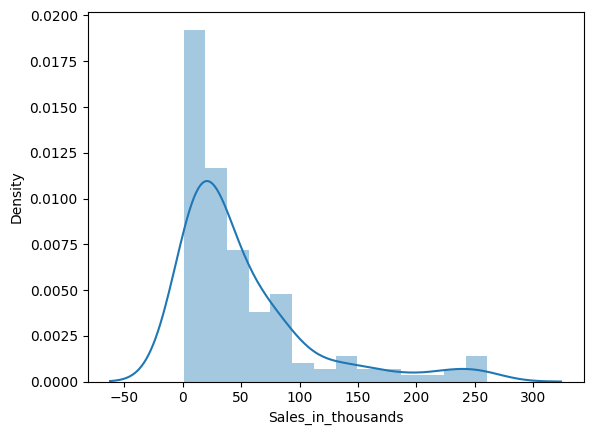

In [18]:
# Very first assumtion is that all the variables should be normally distributed, however that can't be possible
# However we have to be atleast strict about the dependant Y variable

# Distribution of variables
sns.distplot(cars_new.Sales_in_thousands)
plt.show()
# this distribution is highly skewed

# Notes:
#-----------------------------------------------------
# 1. if we get skewed data, then we have to transform the data and there are multiple methods to go about it
# 2. most commonly used and which works on most of the data is log transformation
# 3. Ideally we can do this for each of the dependant variable as well, 
#    however it will depend on amount of data and the amount of analytical rigour
# 4. In no case we can proceed if dependant variable is not normal/near to normal distributed

In [19]:
cars_new.Sales_in_thousands.skew()

1.9924932920508793

C:\Users\ritik\AppData\Local\Temp\ipykernel_39648\1154164408.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_new.ln_sales_in_thousands)


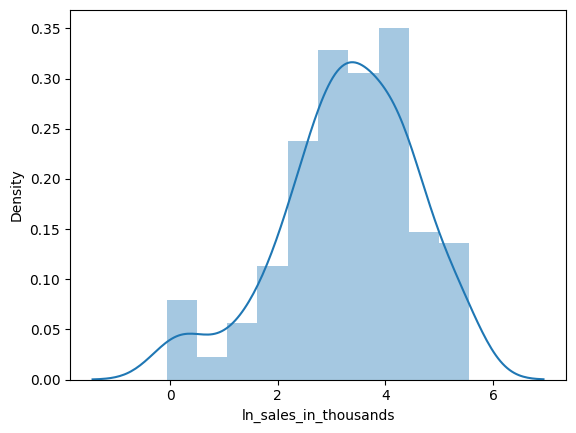

In [20]:
# Note: good practice is to take the log of the data plus 1, bcoz we don't have log of zero defined
# In thios data its not required as sales are always greater than zero

# apply log transformation: log is rescalling the data and making the distribution normal
cars_new.loc[:, 'ln_sales_in_thousands'] = np.log( cars_new.Sales_in_thousands )

# Distribution of variables
sns.distplot(cars_new.ln_sales_in_thousands)
plt.show()

In [21]:
cars_new.ln_sales_in_thousands.skew()

-0.5925861100519006

In [22]:
# rename the variable to follow INC rules
cars_new.rename( columns = {'Manufacturer_Mercedes-B': 'Manufacturer_Mercedes_B'}, inplace = True )

### Variable selection

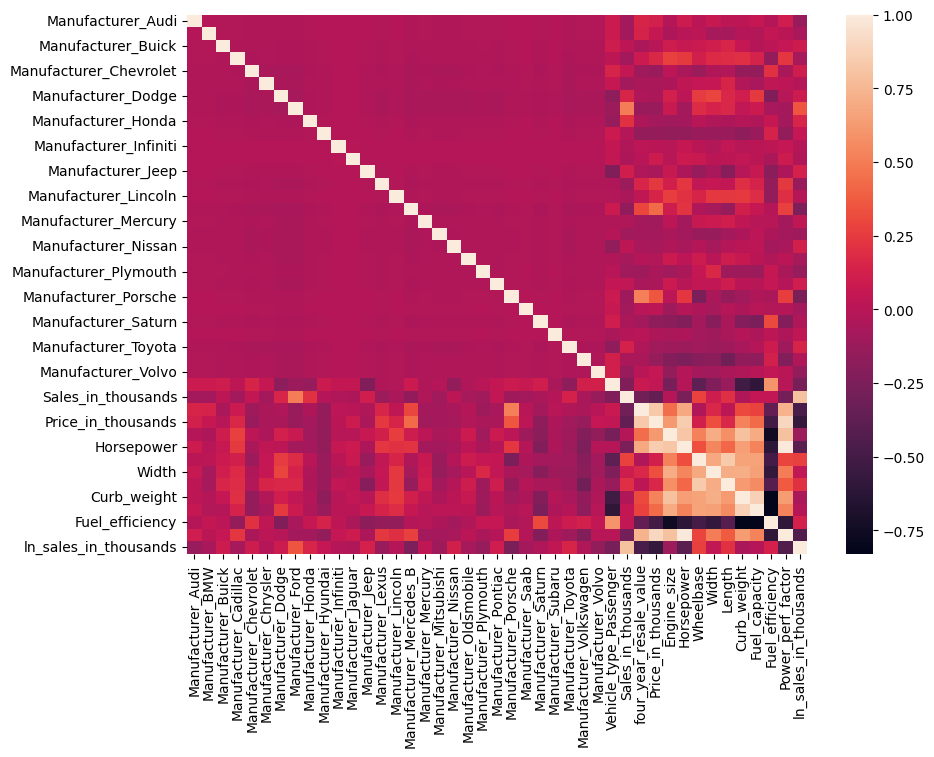

In [23]:
plt.figure( figsize=(10, 7) )
sns.heatmap( cars_new.corr() )
plt.show()

In [24]:
# cars_new.corr().to_excel('D:/corr.xlsx')

#### significance

In [25]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [26]:
X_vars = cars_new.columns.difference(['Sales_in_thousands', 'ln_sales_in_thousands'])

In [27]:
f_values, p_val = f_regression( cars_new.loc[:, X_vars], cars_new.ln_sales_in_thousands )

In [28]:
f_reg = pd.DataFrame([X_vars, f_values, p_val]).T

In [29]:
f_reg.columns = ['Featrues', 'F_Value', 'P_Value']

In [30]:
features = list( f_reg.loc[ f_reg.P_Value <= 0.1, 'Featrues' ] )

In [31]:
len(features)

16

#### multicolinearity

In [32]:
# import the packages for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [33]:
model_param = 'ln_sales_in_thousands ~ ' + ' + '.join(features)

In [34]:
model_param = '''ln_sales_in_thousands ~ Fuel_efficiency + 
        Manufacturer_Audi + Manufacturer_Ford + Manufacturer_Honda + Manufacturer_Mercedes_B + 
        Manufacturer_Plymouth + Manufacturer_Porsche + Manufacturer_Toyota + Manufacturer_Volvo + 
        Price_in_thousands + Vehicle_type_Passenger + Wheelbase '''

In [35]:
# separate the Y and X variables
y, X = dmatrices( model_param, cars_new, return_type = 'dataframe' )

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF Factor'] = [ variance_inflation_factor(X.values, i) for i in range(X.shape[1]) ]

In [37]:
# display the output
vif.round(1).sort_values(by = 'VIF Factor', ascending = False)

,Features,VIF Factor
0,Intercept,618.2
10,Fuel_efficiency,3.9
11,Price_in_thousands,3.2
9,Vehicle_type_Passenger[T.True],2.5
12,Wheelbase,1.6
4,Manufacturer_Mercedes_B[T.True],1.5
6,Manufacturer_Porsche[T.True],1.4
7,Manufacturer_Toyota[T.True],1.2
1,Manufacturer_Audi[T.True],1.1
2,Manufacturer_Ford[T.True],1.1


In [38]:
features = list( vif.loc[1:, 'Features'] )

### train test split

In [39]:
# from sklearn.model_selection import train_test_split
# import statsmodels.formula.api as smf

# this is the method1, which will be used for the input to smf
train, test = train_test_split( cars_new, test_size = 0.3, random_state = 1 )

In [40]:
train.columns

Index(['Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'Sales_in_thousands',
       'four_year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Pow

In [41]:
X_vars = cars_new.columns.difference(['ln_sales_in_thousands', 'Sales_in_thousands'])
y_var = 'ln_sales_in_thousands'

In [42]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

# this is the method2, which will be used for the input to sklearn based methods
X_train, X_test, y_train, y_test = train_test_split( cars_new[X_vars], cars_new[y_var], 
                                                        test_size = 0.3, random_state = 1 )

### Define and fit the model

In [43]:
' + '.join( ['a', 'b', 'c', 'd'] )

'a + b + c + d'

#### model 0: all the variables

In [44]:
# define the model equation
formula_lm = 'ln_sales_in_thousands ~ ' + ' + '.join( X_vars )

In [45]:
# fit the model
lm_0 = smf.ols( formula_lm, train ).fit()

In [46]:
# get the model summary and evaluate the model for stability
print( lm_0.summary() )

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.700
Model:                               OLS   Adj. R-squared:                  0.523
Method:                    Least Squares   F-statistic:                     3.962
Date:                   Sun, 08 Sep 2024   Prob (F-statistic):           3.00e-07
Time:                           11:29:31   Log-Likelihood:                -112.66
No. Observations:                    109   AIC:                             307.3
Df Residuals:                         68   BIC:                             417.7
Df Model:                             40                                         
Covariance Type:               nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

#### model 1 - only important features (variable selection yet to be discussed)

In [47]:
formula_lm1 = '''ln_sales_in_thousands ~ Price_in_thousands + Manufacturer_Ford + Length + 
Fuel_efficiency + Vehicle_type_Passenger'''

In [48]:
# fit the model
lm_1 = smf.ols( formula_lm1, train ).fit()

In [49]:
# get the model summary and evaluate the model for stability
print( lm_1.summary() )

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.493
Model:                               OLS   Adj. R-squared:                  0.469
Method:                    Least Squares   F-statistic:                     20.06
Date:                   Sun, 08 Sep 2024   Prob (F-statistic):           6.39e-14
Time:                           11:29:33   Log-Likelihood:                -141.17
No. Observations:                    109   AIC:                             294.3
Df Residuals:                        103   BIC:                             310.5
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [50]:
# cars_new.columns

#### model 2 - after removal of insignificant variables

In [51]:
formula_m2 = 'ln_sales_in_thousands ~ ' + ' + '.join(features)

#### model 3 - after removal of Multicolinear variables as well

In [53]:
features

['Manufacturer_Audi[T.True]',
 'Manufacturer_Ford[T.True]',
 'Manufacturer_Honda[T.True]',
 'Manufacturer_Mercedes_B[T.True]',
 'Manufacturer_Plymouth[T.True]',
 'Manufacturer_Porsche[T.True]',
 'Manufacturer_Toyota[T.True]',
 'Manufacturer_Volvo[T.True]',
 'Vehicle_type_Passenger[T.True]',
 'Fuel_efficiency',
 'Price_in_thousands',
 'Wheelbase']

In [55]:
formula_m3 = 'ln_sales_in_thousands ~ ' + ' + '.join(features)

In [57]:
formula_m3

'ln_sales_in_thousands ~ Manufacturer_Audi[T.True] + Manufacturer_Ford[T.True] + Manufacturer_Honda[T.True] + Manufacturer_Mercedes_B[T.True] + Manufacturer_Plymouth[T.True] + Manufacturer_Porsche[T.True] + Manufacturer_Toyota[T.True] + Manufacturer_Volvo[T.True] + Vehicle_type_Passenger[T.True] + Fuel_efficiency + Price_in_thousands + Wheelbase'

In [58]:
formula_m3 = 'ln_sales_in_thousands ~ Manufacturer_Audi + Manufacturer_Ford + Manufacturer_Honda + Manufacturer_Mercedes_B + Manufacturer_Plymouth + Manufacturer_Porsche + Manufacturer_Toyota + Manufacturer_Volvo + Vehicle_type_Passenger+ Fuel_efficiency + Price_in_thousands + Wheelbase'

In [59]:
lm3 = smf.ols( formula_m3, train ).fit()
print(lm3.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.549
Model:                               OLS   Adj. R-squared:                  0.492
Method:                    Least Squares   F-statistic:                     9.725
Date:                   Sun, 08 Sep 2024   Prob (F-statistic):           4.05e-12
Time:                           11:30:08   Log-Likelihood:                -134.87
No. Observations:                    109   AIC:                             295.7
Df Residuals:                         96   BIC:                             330.7
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

### Predict the output on train and test

In [60]:
y_train_predict = np.exp(lm3.predict(train))
y_test_predict = np.exp(lm3.predict(test))

In [61]:
#MAPE - Mean Absolute Percentage Error
#MSE - Mean Squared Error
#MAE - Mean Absolute Error

In [62]:
#MAPE - Mean Absolute Percentage Error

mape_train = mean_absolute_percentage_error(train.Sales_in_thousands,y_train_predict)
mape_test = mean_absolute_percentage_error(test.Sales_in_thousands,y_test_predict)
print('MAPE:' ,mape_train,mape_test)

MAPE: 1.0627424267132264 0.7846231858583743


In [63]:
#MSE - Mean Squared Error

mse_train = mean_squared_error(train.Sales_in_thousands,y_train_predict)
mse_test = mean_squared_error(test.Sales_in_thousands,y_test_predict)
print('MSE:' ,mse_train,mse_test)

MSE: 2099.9270142379473 2774.136318762487


In [64]:
#MAE - Mean Absolute Error
mae_train = mean_absolute_error(train.Sales_in_thousands,y_train_predict)
mae_test = mean_absolute_error(test.Sales_in_thousands,y_test_predict)
print('MAE:' ,mae_train,mae_test)

MAE: 27.601753463383492 32.03460484236993


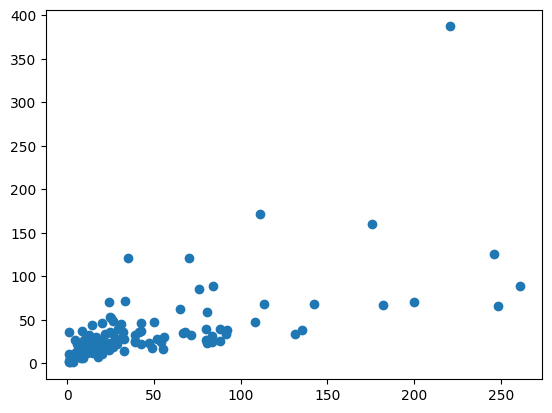

In [65]:
#correlation
plt.scatter(train.Sales_in_thousands,y_train_predict)
plt.show()

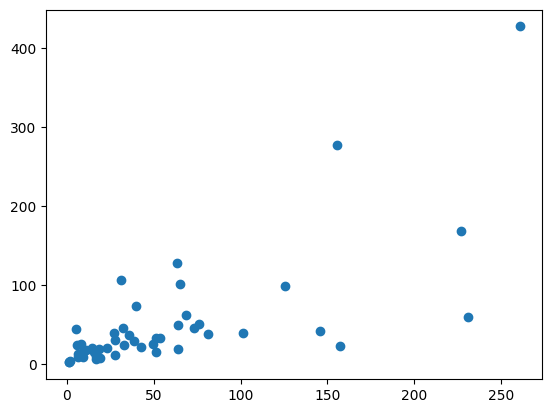

In [66]:
plt.scatter(test.Sales_in_thousands,y_test_predict)
plt.show()

In [67]:
# plt.scatter?

In [68]:
lm3.resid

135    0.165509
77     0.998501
18    -0.090156
48    -1.244025
4      0.652986
         ...   
133    0.059428
137    1.320471
72    -1.091547
140   -0.055905
37     0.775137
Length: 109, dtype: float64

C:\Users\ritik\AppData\Local\Temp\ipykernel_39648\447327322.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lm3.resid)


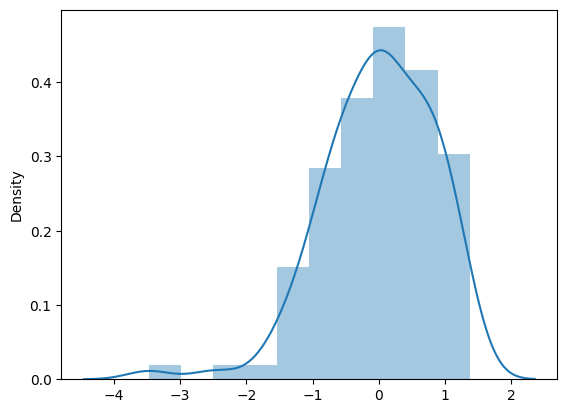

In [69]:
#Assumption Check - Residulas should be normally distributed
sns.distplot(lm3.resid)
plt.show()

In [78]:
#assumption: Mean of errors/residuals should be zero
print(lm3.resid.mean())

-1.2646356948390774e-14


In [81]:
#assumption - errors are independent of the dependent variable
print(stats.stats.pearsonr(lm3.resid,train.ln_sales_in_thousands))

PearsonRResult(statistic=0.6718095818729639, pvalue=1.2808522766411382e-15)


C:\Users\hp\AppData\Local\Temp\ipykernel_21144\919529771.py:2: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  print(stats.stats.pearsonr(lm3.resid,train.ln_sales_in_thousands))


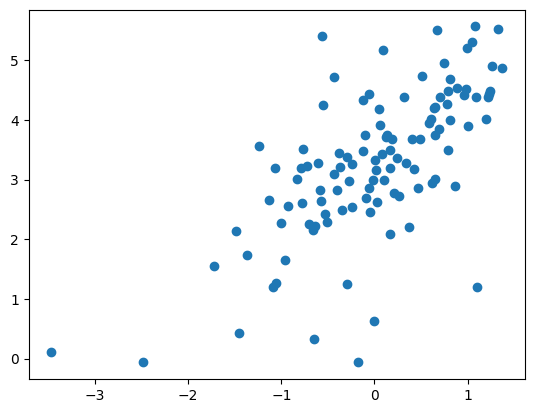

In [82]:
#assumption - homoscedasticity 
plt.scatter(lm3.resid,train.ln_sales_in_thousands)
plt.show()

In [ ]:
##Decile Analysis

In [85]:
train_data = pd.DataFrame([train.Sales_in_thousands,y_train_predict]).T
test_data = pd.DataFrame([test.Sales_in_thousands,y_test_predict]).T

train_data.columns = ['y_actual','y_predicted']
test_data.columns = ['y_actual','y_predicted']

In [88]:
# test_data

In [91]:
train_data['deciles'] = pd.qcut(train_data.y_predicted, 10, range(1,11))
test_data['deciles'] = pd.qcut(test_data.y_predicted, 10, range(1,11))

In [92]:
train_data

,y_actual,y_predicted,deciles
135,33.028,27.989981,6
77,48.911,18.020337,3
18,14.785,16.179886,3
48,35.068,121.670158,10
4,20.397,10.616419,2
...,...,...,...
133,49.989,47.104823,8
137,247.994,66.216753,9
72,3.334,9.931579,1
140,84.087,88.921748,10


In [93]:
decile_train = train_data.groupby('deciles').mean().reset_index().sort_values(by = 'deciles', ascending = False)
decile_test = test_data.groupby('deciles').mean().reset_index().sort_values(by = 'deciles', ascending = False)

C:\Users\hp\AppData\Local\Temp\ipykernel_21144\1299305166.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_train = train_data.groupby('deciles').mean().reset_index().sort_values(by = 'deciles', ascending = False)
C:\Users\hp\AppData\Local\Temp\ipykernel_21144\1299305166.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_test = test_data.groupby('deciles').mean().reset_index().sort_values(by = 'deciles', ascending = False)


In [94]:
decile_train

,deciles,y_actual,y_predicted
9,10,121.557665,135.671009
8,9,110.466636,60.296848
7,8,53.832364,42.181716
6,7,49.750909,35.166177
5,6,40.786000,30.471305
4,5,38.502545,25.864565
3,4,31.621818,21.955942
2,3,21.414545,17.310815
1,2,16.041662,12.500897
0,1,4.951207,5.339028


In [95]:
decile_test

,deciles,y_actual,y_predicted
9,10,147.586864,222.051530
8,9,105.868400,79.137775
7,8,50.123000,47.228760
6,7,88.831000,39.521022
5,6,41.338000,32.441191
4,5,50.545600,24.375896
3,4,35.979500,20.512358
2,3,21.094600,16.562657
1,2,13.290400,10.351303
0,1,7.932000,4.639485
